In [11]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import requests

In [3]:
# study data files
an_wage_path = "data/oecd_av_wage_1990 - 2021_annual_au_us.csv"
cpi_path = "data/oecd_cpi.csv"

# making dataframes
an_wage_df = pd.read_csv(an_wage_path)
cpi_df = pd.read_csv(cpi_path)

# drop unwanted rows
clean_an_wage_df = an_wage_df.iloc[0:64]

# drop unwanted columns
selected_columns = ['Country', 'Time', 'Unit Code', 'Value']

clean_an_wage_df = clean_an_wage_df[selected_columns]
clean_cpi_df = cpi_df[selected_columns]

# change column name
clean_an_wage_df = clean_an_wage_df.rename(columns={'Value':'Annual Wage(Avg.)'})
clean_cpi_df = clean_cpi_df.rename(columns={'Value':'CPI'})

# merge dataframes
dataset = pd.merge(clean_an_wage_df, clean_cpi_df, on=['Country', 'Time'])

# remove decimal of Annual Wage column 
dataset.loc[:,'Annual Wage(Avg.)']=dataset.loc[:,'Annual Wage(Avg.)'].astype(int)

au_df = dataset.loc[dataset['Country'] == 'Australia']
us_df = dataset.loc[dataset['Country'] == 'United States']

print(dataset.to_string())

          Country  Time Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI
0       Australia  1990         AUD              33030          PC  7.333022
1       Australia  1991         AUD              34096          PC  3.176675
2       Australia  1992         AUD              35438          PC  1.012231
3       Australia  1993         AUD              36516          PC  1.753653
4       Australia  1994         AUD              37344          PC  1.969635
5       Australia  1995         AUD              38243          PC  4.627767
6       Australia  1996         AUD              40124          PC  2.615385
7       Australia  1997         AUD              41921          PC  0.224887
8       Australia  1998         AUD              43097          PC  0.860135
9       Australia  1999         AUD              44579          PC  1.483129
10      Australia  2000         AUD              46246          PC  4.457435
11      Australia  2001         AUD              48315          PC  4.407135

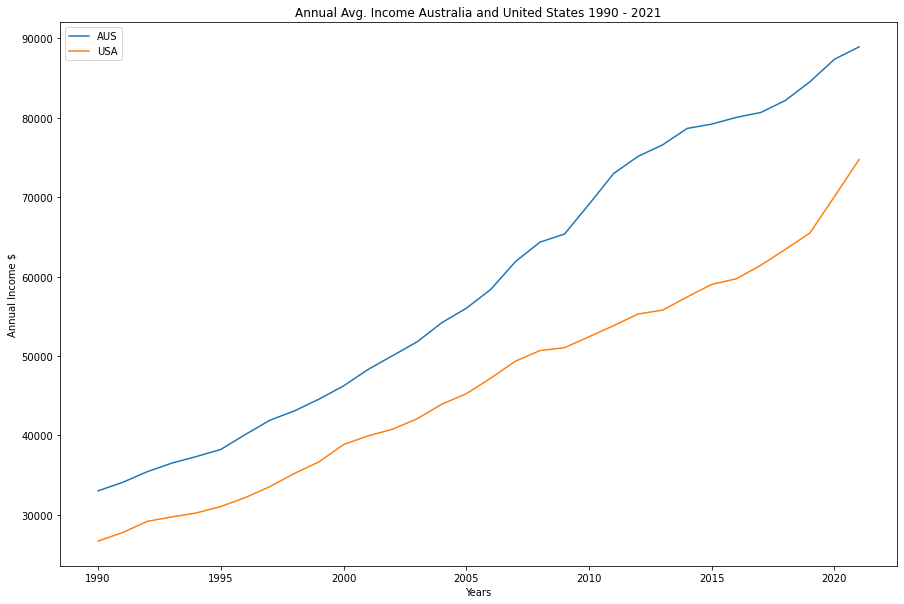

In [4]:
# Australia vs US Average wage growth

ax = au_df.plot(x='Time', y='Annual Wage(Avg.)', label='AUS', figsize = (15,10))
us_df.plot(ax=ax, x='Time', y='Annual Wage(Avg.)', label="USA" )
plt.ylabel('Annual Income $')
plt.xlabel('Years')
plt.title('Annual Avg. Income Australia and United States 1990 - 2021')
plt.legend()
plt.show()

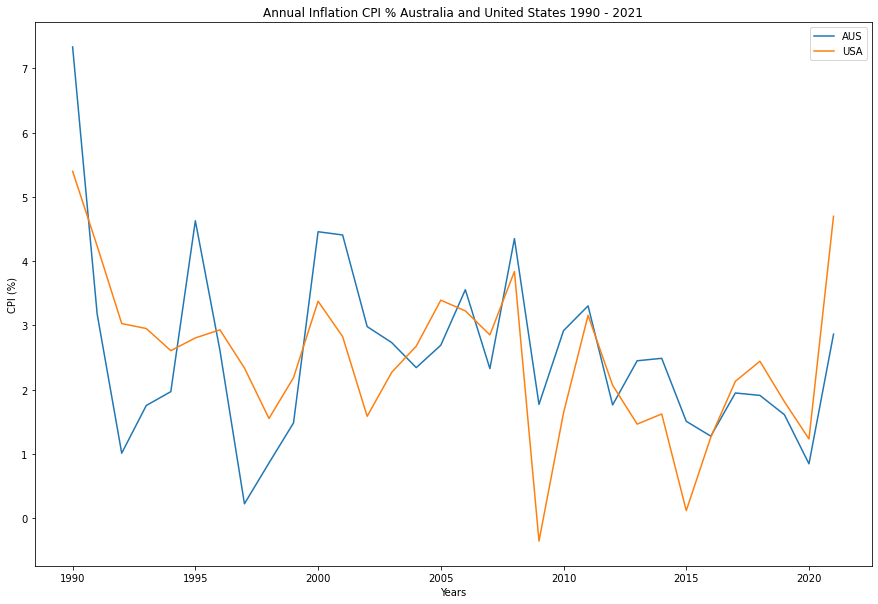

In [5]:
# Australia vs US CPI %%


ax = au_df.plot(x='Time', y='CPI', label='AUS', figsize = (15,10))
us_df.plot(ax=ax, x='Time', y='CPI', label="USA" )
plt.ylabel('CPI (%)')
plt.xlabel('Years')
plt.title('Annual Inflation CPI % Australia and United States 1990 - 2021')
plt.legend()
plt.show()


Text(0, 0.5, 'CPI %')

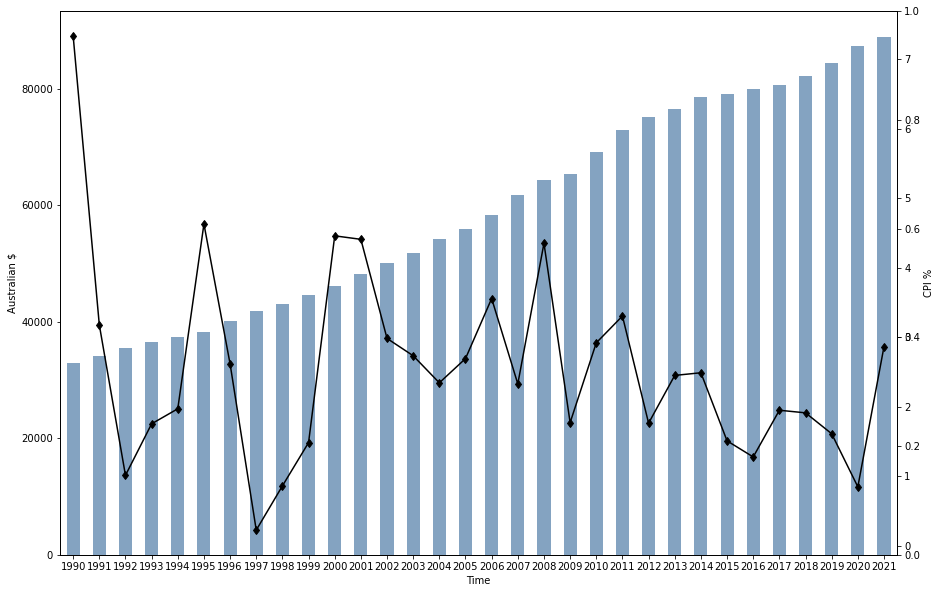

In [6]:
# Australia CPI vs Income

# x_axis = au_df["Time"]
# tick_locations = [value for value in x_axis]

time_idx_df = au_df.set_index(au_df['Time'])

fig, ax1 = plt.subplots(figsize = (15,10))
time_idx_df['Annual Wage(Avg.)'].plot(kind = 'bar', color=(0.2, 0.4, 0.6, 0.6))
au_df['CPI'].plot(kind='line', marker='d', secondary_y=True, color='black')
ax2 = ax1.twinx()
ax1.set_ylabel('Australian $')
ax2.set_ylabel('CPI %')

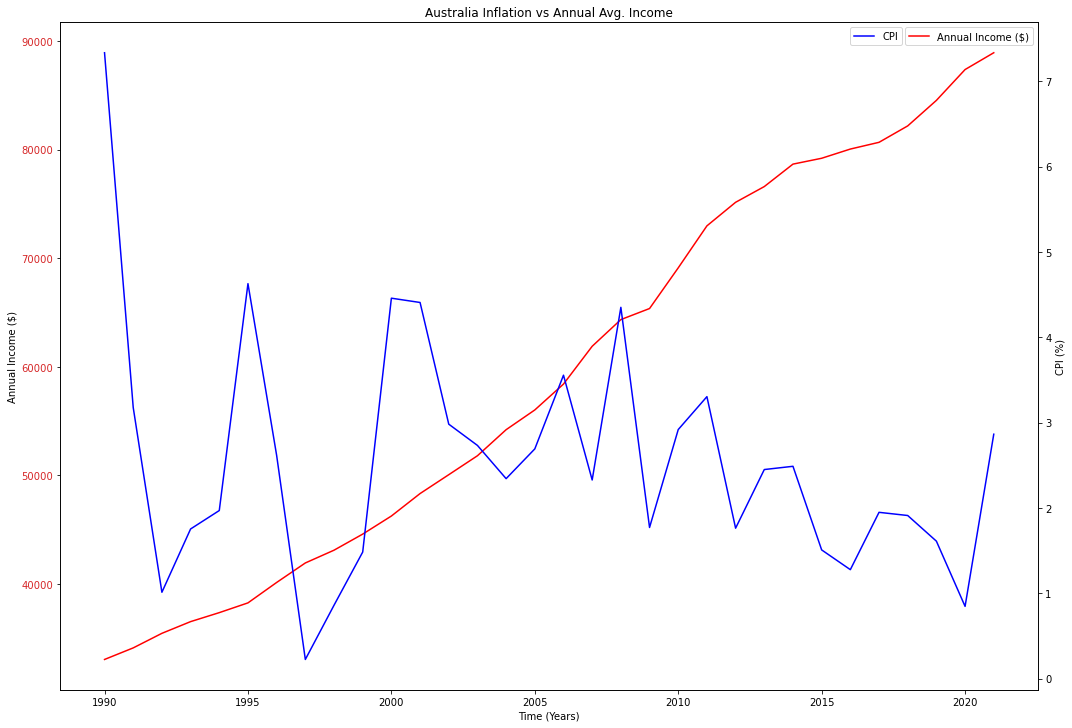

In [7]:
# Australia CPI vs Income

y2 = au_df["CPI"]
x2 = au_df["Annual Wage(Avg.)"]
x1 = au_df["Time"]

fig, ax1 = plt.subplots(figsize = (15,10))

color = 'tab:red'

ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Annual Income ($)')
label1=['CPI']
label2=['Annual Income ($)']


ax1.plot(x1, x2, color='r')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(label2, loc="best")


ax2 = ax1.twinx()

ax2.set_ylabel('CPI (%)')

ax2.plot(x1, y2, color='b')
ax2.tick_params(axis='y')
fig.tight_layout()
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('Australia Inflation vs Annual Avg. Income')
plt.show()

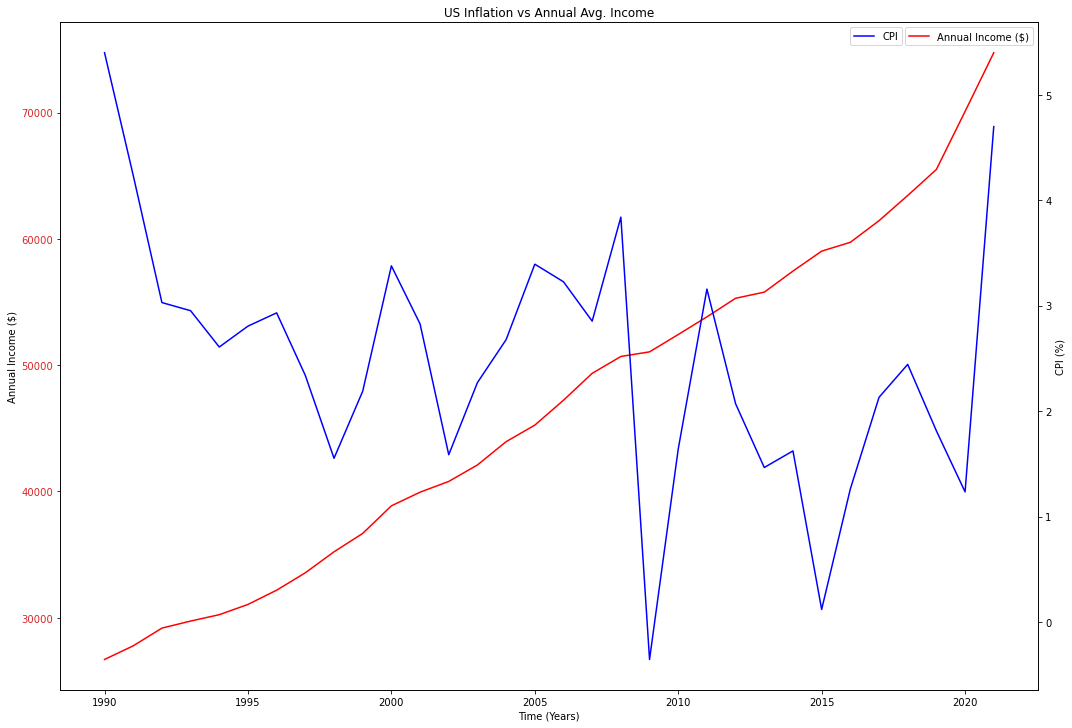

In [8]:
# US CPI vs Income

y2 = us_df["CPI"]
x2 = us_df["Annual Wage(Avg.)"]
x1 = us_df["Time"]

fig, ax1 = plt.subplots(figsize = (15,10))

color = 'tab:red'

ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Annual Income ($)')
label1=['CPI']
label2=['Annual Income ($)']


ax1.plot(x1, x2, color='r')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(label2, loc="best")


ax2 = ax1.twinx()

ax2.set_ylabel('CPI (%)')

ax2.plot(x1, y2, color='b')
ax2.tick_params(axis='y')
fig.tight_layout()
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('US Inflation vs Annual Avg. Income')
plt.show()

In [22]:
trim_df = us_df.loc[us_df["Time"]>=2003]
trim_df = trim_df.rename(columns={'Time':'year'})
trim_df


,Country,year,Unit Code_x,Annual Wage(Avg.),Unit Code_y,CPI
45,United States,2003,USD,42101,PC,2.270095
46,United States,2004,USD,43945,PC,2.677237
47,United States,2005,USD,45254,PC,3.392747
48,United States,2006,USD,47225,PC,3.225944
49,United States,2007,USD,49354,PC,2.852673
50,United States,2008,USD,50689,PC,3.839100
51,United States,2009,USD,51055,PC,-0.355546
52,United States,2010,USD,52428,PC,1.640043
53,United States,2011,USD,53827,PC,3.156842
54,United States,2012,USD,55298,PC,2.069337


In [23]:
key = "HuzvVbyZtiD8rqcs_m4i"

url = f"https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.json?api_key={key}"


response = requests.get(url).json()

oil_df = pd.DataFrame.from_dict(response)

new_dataset = pd.DataFrame(oil_df['dataset']['data'],columns=['date','oil_price'])

new_dataset['year'] = new_dataset['date'].str[0:4].astype(int)

grouped_df = new_dataset.groupby(['year']).mean()

# grouped_df = grouped_df.iloc\

new_df = grouped_df.iloc[0:19,:]

new_df

final_df = pd.merge(trim_df, new_df, on=['year'])

final_df

# grouped_df = grouped_df.iloc[grouped_df["Year"]<=2021]


,Country,year,Unit Code_x,Annual Wage(Avg.),Unit Code_y,CPI,oil_price
0,United States,2003,USD,42101,PC,2.270095,28.123735
1,United States,2004,USD,43945,PC,2.677237,36.009115
2,United States,2005,USD,45254,PC,3.392747,50.707248
3,United States,2006,USD,47225,PC,3.225944,61.080584
4,United States,2007,USD,49354,PC,2.852673,69.076705
5,United States,2008,USD,50689,PC,3.839100,94.452171
6,United States,2009,USD,51055,PC,-0.355546,61.058333
7,United States,2010,USD,52428,PC,1.640043,77.445907
8,United States,2011,USD,53827,PC,3.156842,107.464147
9,United States,2012,USD,55298,PC,2.069337,109.452752


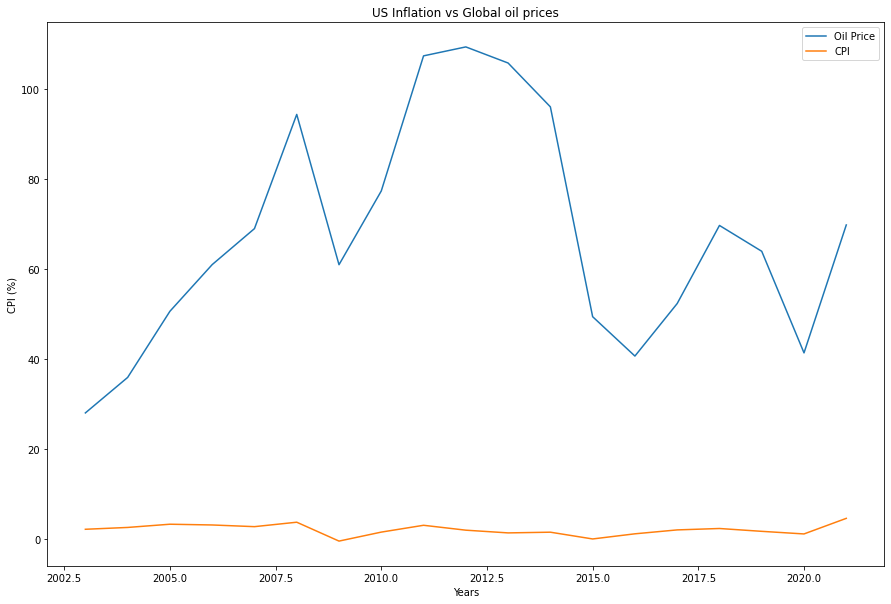

In [24]:
ax = final_df.plot(x='year', y='oil_price', label='Oil Price', figsize = (15,10))
final_df.plot(ax=ax, x='year', y='CPI', label="CPI" )
plt.ylabel('CPI (%)')
plt.xlabel('Years')
plt.title('US Inflation vs Global oil prices')
plt.legend()
plt.show()